In [1]:
from itertools import islice

import matplotlib.pyplot as plt
import networkx as nx
from networkx.classes.function import path_weight
import numpy as np
import tqdm

from networkx.generators.harary_graph import hkn_harary_graph
import h5py

In [2]:
def path_to_bit_rep(p, G):
    p = [(v, p[i+1]) for i, v in enumerate(p[:-1])]
    
    bit_rep = []
    for e in G.edges():
        if (e[0], e[1]) in p:
            bit_rep.append(1)
        else:
            bit_rep.append(0)
    
    return np.array(bit_rep)


def compute_dH(p0, p1, G):
    p0 = path_to_bit_rep(p0, G)
    p1 = path_to_bit_rep(p1, G)
    
    return np.abs(p0 - p1).sum()


def sp(G, source, target):
    G = nx.DiGraph(G)
    
    np.random.seed()
    W = np.random.randn(G.number_of_edges()) / 6 + 0.5
    W[W < 0] = 0
    W[W > 1] = 1
    for i, e in enumerate(G.edges()):
        G[e[0]][e[1]]['weight'] = W[i]

    p0, p1 = list(islice(nx.shortest_simple_paths(G, source, target, weight="weight"), 2))

    delta = path_weight(G, p1, weight="weight") - path_weight(G, p0, weight="weight")

    return delta

34


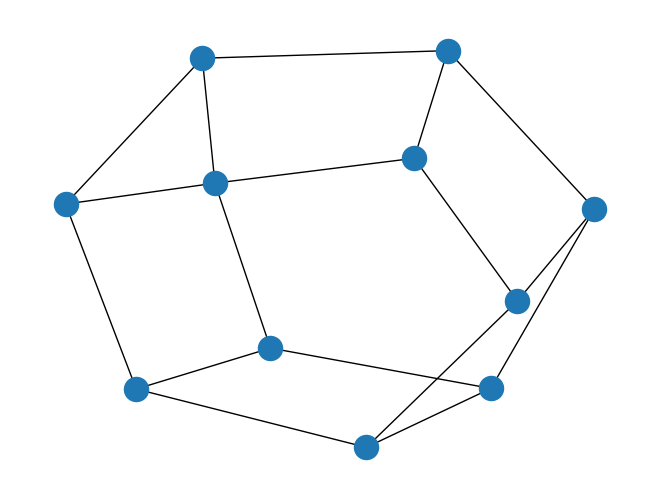

In [3]:
G = hkn_harary_graph(3, 11)
print(G.number_of_edges()*2)
nx.draw(G)

In [4]:
for n in range(4, 15):
    G = hkn_harary_graph(3, n)
    longest = (0, 0, 0)
    paths = nx.shortest_path(G)
    for s in G.nodes:
        for t in G.nodes:
            if len(paths[s][t]) > longest[2]:
                longest = (s, t, len(paths[s][t]))

    Ad = nx.adjacency_matrix(G).todense()
    with h5py.File(f"data/graph_n={n}.jld", "w") as hf:
        hf.create_dataset("Ad", data=Ad)
        hf.create_dataset("source", data=longest[0]+1)
        hf.create_dataset("target", data=longest[1]+1)